In [34]:
import numpy as np
import os
import spacy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from spacy.vocab import Vocab




## Preprocessing

## Glove training

## Plot Distances

In [2]:
# Open the vector file and parse each line
VECTOR_DIRECTORY = "GloVe"
VECTOR_FILE = "vectors.txt"

# print(os.path.join(VECTOR_DIRECTORY,VECTOR_FILE))
word_vectors = {}
with open(os.path.join(VECTOR_DIRECTORY,VECTOR_FILE), "r") as f:
    for line in f:
        # Split the line into the word and the coordinates
        parts = line.strip().split()
        word = parts[0]
        vector = [float(x) for x in parts[1:]]
        # Store the vector in the dictionary
        word_vectors[word] = vector

In [22]:
len(word_vectors)

71291

In [32]:
import gensim

# Load pre-trained word vectors from a file
custom_vectors = gensim.models.KeyedVectors.load_word2vec_format(os.path.join(VECTOR_DIRECTORY,VECTOR_FILE))
custom_vocab = [ word for word in custom_vectors.key_to_index]


In [35]:

# Create a blank 'en' model
nlp = spacy.blank('en')
vocab = Vocab(strings=custom_vocab)

nlp.vocab = vocab
nlp.vocab.vectors = spacy.vocab.Vectors(data=np.array([x for x in word_vectors.values()]), keys=word_vectors.keys())


In [8]:
def most_similar(x, n=10):
    """Returns the n most similar words to the given vector x"""
    list = nlp.vocab.vectors.most_similar(x.reshape(1, -1), n=n)
    list = [nlp.vocab[i] for i in list[0][0]]
    return list

In [45]:
print(' '.join(w.text for w in most_similar(nlp.vocab['boy'].vector)))

boy girl game nintendo scouts big wolf man tiger games


In [46]:
from  sklearn.manifold import TSNE
import matplotlib.pyplot as plt
colors = [
    'red', 'green', 'blue', 'yellow', 'purple', 'orange', 'black', 'lime', 'pink'
]

n_sample = 10

def plot_most_similar(vocabulary):
    most_similar = []
    for word in vocabulary:
        query = np.asarray([word.vector])
        most_similar.append(nlp.vocab.vectors.most_similar(query, n=n_sample))

    vectors = []
    labels = []
    for similars in most_similar:
        for key in similars[0][0]:
            vectors.append(nlp.vocab[key].vector)
            labels.append(nlp.vocab.strings[key])

    reduced_vectors = TSNE(n_components=2).fit_transform(np.asanyarray(vectors))
  
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    index_label = 0
    for vector in reduced_vectors:
        ax.scatter(vector[0], vector[1], c=colors[int(index_label / n_sample)])
        ax.annotate(labels[index_label], (vector[0], vector[1]))
        index_label += 1

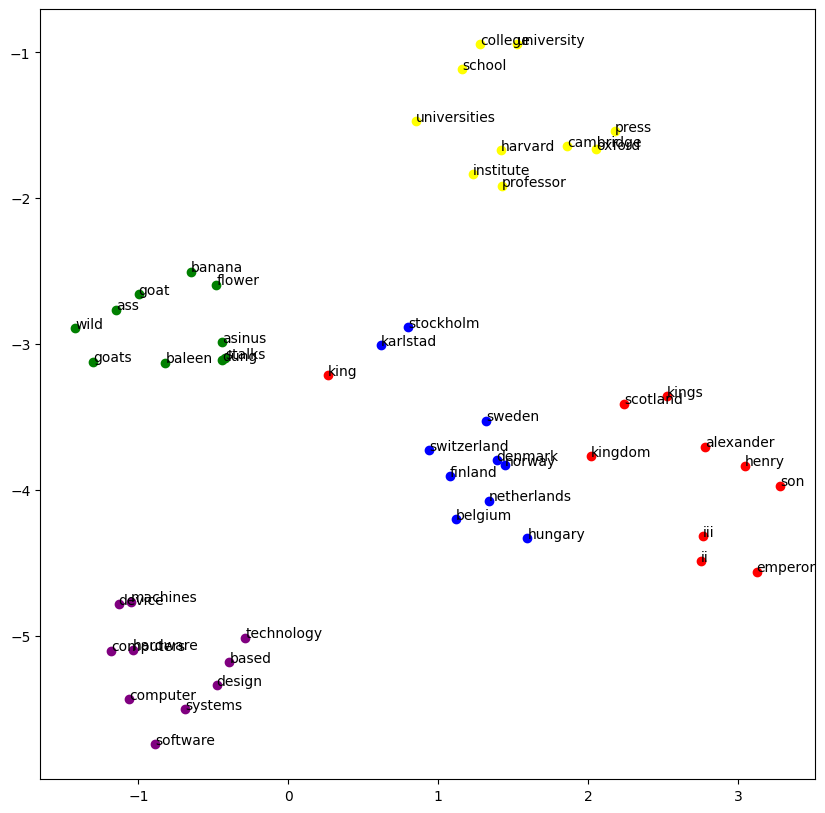

In [47]:
plot_most_similar(nlp.vocab[w] for w in ['king', 'goat', 'sweden', 'university', 'computer'])